In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [2]:
data_paths = [
    "Data\\SOCOFing\\SOCOFing\\Real",
    "Data\SOCOFing\SOCOFing\Altered\Altered-Easy",
    "Data\SOCOFing\SOCOFing\Altered\Altered-Medium",
    "Data\SOCOFing\SOCOFing\Altered\Altered-Hard",
]
img_height, img_width = 96,96

def preprocess_images(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_width, img_height))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype('float32') / 255.0
    return img

def load_and_extract_features(dataset_path, model):
    images = []
    labels = []
    features = []
    for file in os.listdir(dataset_path):
        if file.endswith(".BMP"):
            img_path = os.path.join(dataset_path,file)
            img = preprocess_images(img_path)
            img = np.expand_dims(img, axis=0)
            feature = model.predict(img)
            features.append(feature.flatten())
            images.append(img)
            label = int(file.split("__")[0])-1
            labels.append(label)
    return np.array(features), np.array(labels)

In [3]:
# Tạo mô hình MobileNetV2 để trích xuất đặc trưng
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
# Add global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Create the new model
model2 = Model(inputs=base_model.input, outputs=x)
features, labels = load_and_extract_features(dataset_path,model2)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
np.save('fingerprint_features_MobileNet.npy', features)
np.save('fingerprint_labels3_MobileNet.npy', encoded_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━

KeyboardInterrupt: 

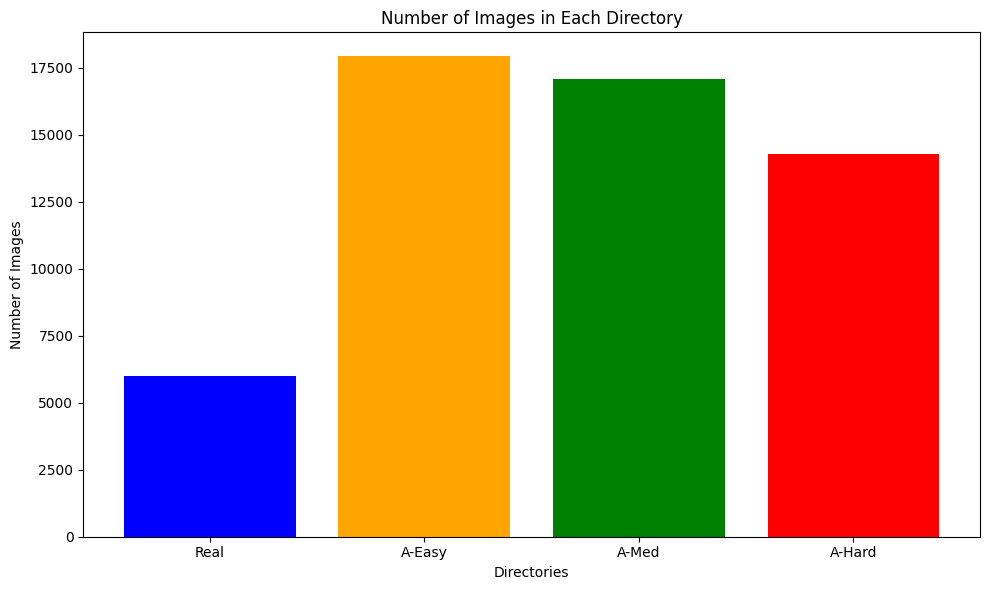

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_paths = [
    "Data\\SOCOFing\\SOCOFing\\Real",
    "Data\\SOCOFing\\SOCOFing\\Altered\\Altered-Easy",
    "Data\\SOCOFing\\SOCOFing\\Altered\\Altered-Medium",
    "Data\\SOCOFing\\SOCOFing\\Altered\\Altered-Hard",
]
img_height, img_width = 96, 96

def preprocess_images(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_width, img_height))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype('float32') / 255.0
    return img

def load_and_extract_features(dataset_path, model):
    images = []
    labels = []
    features = []
    for file in os.listdir(dataset_path):
        if file.endswith(".BMP"):
            img_path = os.path.join(dataset_path, file)
            img = preprocess_images(img_path)
            img = np.expand_dims(img, axis=0)
            feature = model.predict(img)
            features.append(feature.flatten())
            images.append(img)
            label = int(file.split("__")[0]) - 1
            labels.append(label)
    return np.array(features), np.array(labels)

def count_images_in_directories(data_paths):
    counts = []
    for path in data_paths:
        count = sum(1 for file in os.listdir(path) if file.endswith(".BMP"))
        counts.append(count)
    return counts

def plot_image_counts(data_paths, counts):
    # Đặt nhãn ngắn gọn cho các thư mục
    labels = ['Real', 'A-Easy', 'A-Med', 'A-Hard']
    
    # Chọn màu sắc khác nhau cho mỗi cột
    colors = ['blue', 'orange', 'green', 'red']

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=colors)
    plt.xlabel('Directories')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Directory')
    plt.tight_layout()
    plt.show()

# Đếm số lượng ảnh trong mỗi thư mục
image_counts = count_images_in_directories(data_paths)

# Vẽ biểu đồ số lượng ảnh
plot_image_counts(data_paths, image_counts)